<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment2/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [3]:
from pycaret.utils import version
version()

'3.1.0'

In [4]:
from google.colab import files

In [ ]:
# load sample dataset
uploaded = files.upload()


In [5]:
import pandas as pd
import io

In [ ]:
data =pd.read_csv(io.BytesIO(uploaded['test.csv']))

data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


#1 Binary Classfication Models

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'touch_screen', session_id = 123)

,Description,Value
0,Session id,123
1,Target,touch_screen
2,Target type,Binary
3,Original data shape,"(1000, 21)"
4,Transformed data shape,"(1000, 21)"
5,Transformed train set shape,"(700, 21)"
6,Transformed test set shape,"(300, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
exp.setup(data, target = 'touch_screen', session_id = 123)

,Description,Value
0,Session id,123
1,Target,touch_screen
2,Target type,Binary
3,Original data shape,"(1000, 21)"
4,Transformed data shape,"(1000, 21)"
5,Transformed train set shape,"(700, 21)"
6,Transformed test set shape,"(300, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5286,0.5216,0.4971,0.5359,0.5105,0.0571,0.0588,0.3680
dt,Decision Tree Classifier,0.5100,0.5100,0.5143,0.5073,0.5084,0.0200,0.0200,0.0340
knn,K Neighbors Classifier,0.5086,0.5000,0.5114,0.5117,0.5088,0.0171,0.0174,0.0430
et,Extra Trees Classifier,0.5071,0.5278,0.4714,0.5017,0.4812,0.0143,0.0133,0.2320
lightgbm,Light Gradient Boosting Machine,0.5057,0.5004,0.5171,0.5082,0.5115,0.0114,0.0113,0.3690
svm,SVM - Linear Kernel,0.5000,0.0000,0.3543,0.4500,0.3412,0.0000,0.0005,0.0340
dummy,Dummy Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570
ada,Ada Boost Classifier,0.4971,0.4767,0.4943,0.4952,0.4935,-0.0057,-0.0056,0.2900
gbc,Gradient Boosting Classifier,0.4971,0.4958,0.4943,0.4989,0.4949,-0.0057,-0.0055,0.4320
nb,Naive Bayes,0.4800,0.4752,0.5029,0.4823,0.4904,-0.0400,-0.0404,0.0320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5286,0.5216,0.4971,0.5359,0.5105,0.0571,0.0588,0.2940
dt,Decision Tree Classifier,0.5100,0.5100,0.5143,0.5073,0.5084,0.0200,0.0200,0.0690
knn,K Neighbors Classifier,0.5086,0.5000,0.5114,0.5117,0.5088,0.0171,0.0174,0.0640
et,Extra Trees Classifier,0.5071,0.5278,0.4714,0.5017,0.4812,0.0143,0.0133,0.4240
lightgbm,Light Gradient Boosting Machine,0.5057,0.5004,0.5171,0.5082,0.5115,0.0114,0.0113,0.3190
svm,SVM - Linear Kernel,0.5000,0.0000,0.3543,0.4500,0.3412,0.0000,0.0005,0.0520
dummy,Dummy Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0310
ada,Ada Boost Classifier,0.4971,0.4767,0.4943,0.4952,0.4935,-0.0057,-0.0056,0.1540
gbc,Gradient Boosting Classifier,0.4971,0.4958,0.4943,0.4989,0.4949,-0.0057,-0.0055,0.2520
nb,Naive Bayes,0.4800,0.4752,0.5029,0.4823,0.4904,-0.0400,-0.0404,0.0580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

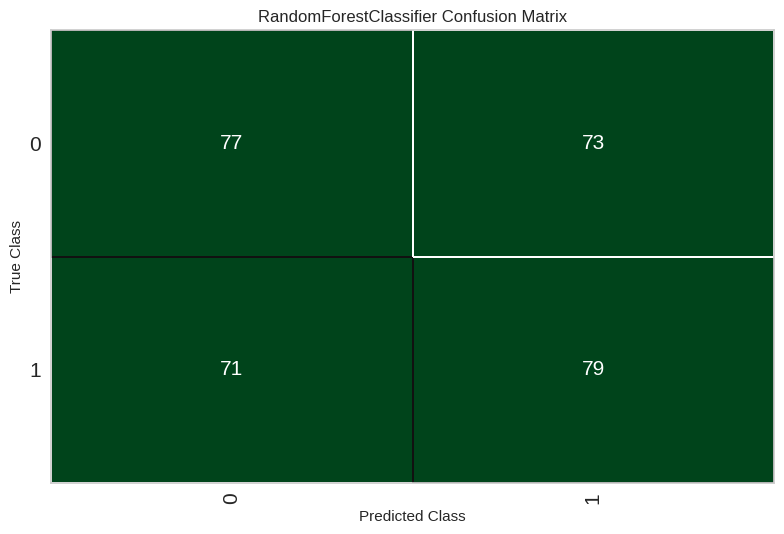

In [ ]:
plot_model(best, plot = 'confusion_matrix')

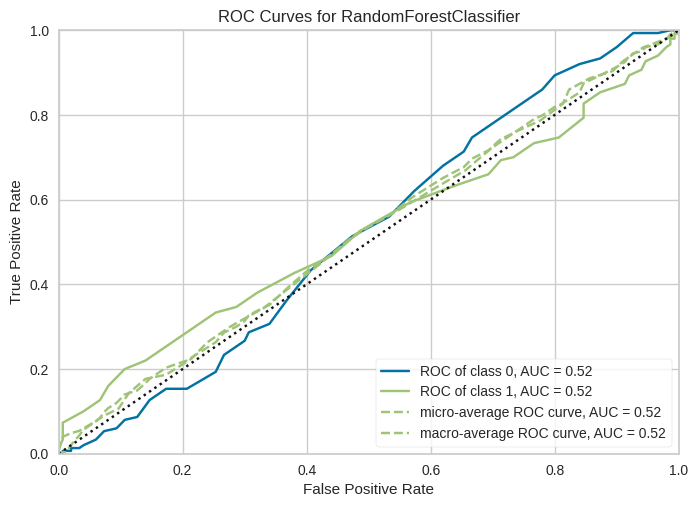

In [ ]:
plot_model(best, plot = 'auc')

#Clustering

In [ ]:
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [ ]:
data =pd.read_csv(io.BytesIO(uploaded['wine-clustering.csv']))
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5620,708.0867,0.5443,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5025,454.0589,0.5561,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.600000,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 3
1,13.20,1.78,2.14,11.200000,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 3
2,13.16,2.36,2.67,18.600000,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 0
3,14.37,1.95,2.50,16.799999,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 0
4,13.24,2.59,2.87,21.000000,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.500000,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Cluster 2
174,13.40,3.91,2.48,23.000000,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Cluster 2
175,13.27,4.28,2.26,20.000000,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Cluster 2
176,13.17,2.59,2.37,20.000000,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Cluster 2


In [ ]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

#Anomaly Detection


In [6]:
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [10]:
data =pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
data
data1 = data.iloc[:,1:10]
data1

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739
...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087


Failed to load with anomaly dataset

In [11]:
# import pycaret anomaly and init setup
from pycaret.anomaly import *
s = setup(data1, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(284807, 9)"
2,Transformed data shape,"(284807, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [12]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

In [13]:
# check the type of exp
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [14]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(284807, 31)"
2,Transformed data shape,"(284807, 31)"
3,Numeric features,31
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Create a Model

In [15]:
# train iforest model
iforest = create_model('iforest')
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [16]:
# to check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


Assignm Model

In [20]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anomaly,Anomaly_Score
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0,-0.109725
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,0,-0.175654
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0,-0.077052
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,0,-0.116425
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0,-0.138580
...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,1,0.196792
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,0,-0.119935
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,0,-0.053786
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,0,-0.153083


Prediction

In [22]:
# predict on test set
iforest_pred = predict_model(iforest, data=data1)
iforest_pred

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anomaly,Anomaly_Score
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0,-0.109725
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,0,-0.175654
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0,-0.077052
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,0,-0.116425
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0,-0.138580
...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,1,0.196792
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,0,-0.119935
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,0,-0.053786
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,0,-0.153083


#Time Series Forecasting


In [24]:
uploaded = files.upload()

Saving Alcohol_Sales.csv to Alcohol_Sales.csv


In [61]:
import numpy as np
data =pd.read_csv(io.BytesIO(uploaded['Alcohol_Sales.csv']))
data.rename(columns={"S4248SM144NCEN": "Sales"},inplace=True)
data['Date'] = pd.to_datetime(data['DATE'])
data = data[['Date','Sales']]
data = data.set_index('Date')
data

,Sales
Date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='Date'>

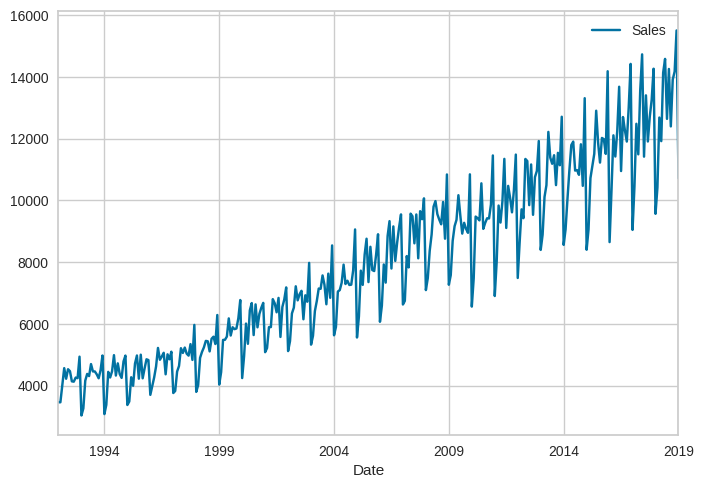

In [62]:
# plot the dataset
data.plot()

Dose not work here right now. I do not know what to do next
I have been trying to solve this for 6 hours and can't get rid of it.

In [63]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(325, 1)"
5,Transformed data shape,"(325, 1)"
6,Transformed train set shape,"(322, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [64]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [65]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [66]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(325, 1)"
5,Transformed data shape,"(325, 1)"
6,Transformed train set shape,"(322, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Check Status


In [67]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,325.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,7886.4
3,Summary,Statistics,Transformed,Median,,7481.0
4,Summary,Statistics,Transformed,Standard Deviation,,2914.269061
5,Summary,Statistics,Transformed,Variance,,8492964.160494
6,Summary,Statistics,Transformed,Kurtosis,,-0.811955
7,Summary,Statistics,Transformed,Skewness,,0.385836
8,Summary,Statistics,Transformed,# Distinct Values,,323.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",5099.841047


In [68]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.7830,0.6754,322.0316,352.2840,0.0260,0.0260,0.8221,104.8667
exp_smooth,Exponential Smoothing,0.9456,0.8176,388.7883,426.4003,0.0292,0.0294,0.7178,0.3167
ets,ETS,0.9832,0.8497,404.2032,443.0847,0.0302,0.0305,0.6938,0.8400
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0271,1.0278,422.2196,535.9286,0.0335,0.0336,0.6026,70.7767
arima,ARIMA,1.0418,0.9266,428.0428,482.9976,0.0325,0.0330,0.6083,0.8433
theta,Theta Forecaster,1.0443,0.9388,429.1692,489.3658,0.0315,0.0321,0.6272,0.8033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.1093,1.0364,456.0516,540.4986,0.0352,0.0358,0.5703,0.9600
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1104,1.0018,456.3598,522.4328,0.0344,0.0352,0.5278,0.9500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1755,1.1312,483.3161,589.9321,0.0382,0.0384,0.5026,0.2100
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.2447,1.1460,511.6633,597.5264,0.0402,0.0406,0.5084,0.9600


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [69]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.7830,0.6754,322.0316,352.2840,0.0260,0.0260,0.8221,105.1300
exp_smooth,Exponential Smoothing,0.9456,0.8176,388.7883,426.4003,0.0292,0.0294,0.7178,0.7400
ets,ETS,0.9832,0.8497,404.2032,443.0847,0.0302,0.0305,0.6938,0.8367
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0271,1.0278,422.2196,535.9286,0.0335,0.0336,0.6026,71.2133
arima,ARIMA,1.0418,0.9266,428.0428,482.9976,0.0325,0.0330,0.6083,0.8467
theta,Theta Forecaster,1.0443,0.9388,429.1692,489.3658,0.0315,0.0321,0.6272,0.7967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.1093,1.0364,456.0516,540.4986,0.0352,0.0358,0.5703,0.9700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1104,1.0018,456.3598,522.4328,0.0344,0.0352,0.5278,0.9533
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1755,1.1312,483.3161,589.9321,0.0382,0.0384,0.5026,0.2133
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.2447,1.1460,511.6633,597.5264,0.0402,0.0406,0.5084,0.9933


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

AutoARIMA(random_state=123, sp=12, suppress_warnings=True)

In [70]:
# plot forecast
plot_model(best, plot = 'forecast')

In [71]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [72]:
# residuals plot
plot_model(best, plot = 'residuals')

Prediction

In [73]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,1.0947,0.9715,455.6269,512.7635,0.0318,0.0324,0.9354


In [75]:
# show predictions df
holdout_pred.head()

,y_pred
2018-11,13627.9016
2018-12,14816.3779
2019-01,10584.8397


In [74]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
2018-11,13627.9016
2018-12,14816.3779
2019-01,10584.8397
2019-02,11091.0368
2019-03,12906.2557
2019-04,13007.2498
2019-05,14449.4554
2019-06,14926.5348
2019-07,13712.6866
2019-08,14313.3796
